### Notebook to plot highest EKE ensemble member to compare surface salinity and temperature stucture 

In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
from xhistogram.xarray import histogram
from datetime import timedelta
import time

import warnings
warnings.filterwarnings("ignore") #The chaotic option, used to suppress issues with cf_time with xroms 

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot as plt, patches

In [2]:
# ene_h = []
# ene_u = []
# ene_m = []
# #Specify number of paths and open
# npaths_hsimt = 8
# for i in range(npaths_hsimt):
#     ene_h.append(xr.open_dataset('ene_vint_whole_hsimt_'+'ensemble_'+str(i)+'.nc'))
#     ene_u.append(xr.open_dataset('ene_vint_whole_u3c4_'+'ensemble_'+str(i)+'.nc'))
#     ene_m.append(xr.open_dataset('ene_vint_whole_mpdata_'+'ensemble_'+str(i)+'.nc'))

# # The first simulation was accidentally run longer than 30 days. Just lop off those end points manually 
# ene_u[0] = ene_u[0].isel(ocean_time = slice(0,721))
# ene_h[0] = ene_h[0].isel(ocean_time = slice(0,721))
# ene_m[0] = ene_m[0].isel(ocean_time = slice(0,721))

# eke_h = np.array([ene_h[0].eke[-1],ene_h[1].eke[-1],ene_h[2].eke[-1],ene_h[3].eke[-1],ene_h[4].eke[-1],ene_h[5].eke[-1],ene_h[6].eke[-1],ene_h[7].eke[-1]])
# mke_h = np.array([ene_h[0].mke[0],ene_h[1].mke[0],ene_h[2].mke[0],ene_h[3].mke[0],ene_h[4].mke[0],ene_h[5].mke[0],ene_h[6].mke[0],ene_h[7].mke[0]])
# eke_u = np.array([ene_u[0].eke[-1],ene_u[1].eke[-1],ene_u[2].eke[-1],ene_u[3].eke[-1],ene_u[4].eke[-1],ene_u[5].eke[-1],ene_u[6].eke[-1],ene_u[7].eke[-1]])
# mke_u = np.array([ene_u[0].mke[0],ene_u[1].mke[0],ene_u[2].mke[0],ene_u[3].mke[0],ene_u[4].mke[0],ene_u[5].mke[0],ene_u[6].mke[0],ene_u[7].mke[0]])
# eke_m = np.array([ene_m[0].eke[-1],ene_m[1].eke[-1],ene_m[2].eke[-1],ene_m[3].eke[-1],ene_m[4].eke[-1],ene_m[5].eke[-1],ene_m[6].eke[-1],ene_m[7].eke[-1]])
# mke_m = np.array([ene_m[0].mke[0],ene_m[1].mke[0],ene_m[2].mke[0],ene_m[3].mke[0],ene_m[4].mke[0],ene_m[5].mke[0],ene_m[6].mke[0],ene_m[7].mke[0]])

In [3]:
# print(eke_h/mke_h)
# print(eke_m/mke_m)
# print(eke_u/mke_u)

### Starting from an index of one, we want:
> - HSIMT: ensemble 2
> - MPDATA: ensemble 3
> - U3HC4: ensemble 1

In [4]:
paths = ['/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_mpdata_uwind_zerop1_dt_30_across2x_50d_ensmb2_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_u3hc4_uwind_zerop1_dt_30_across2x_50d_ensmb3_his.nc',
         '/d1/shared/shelfstrat_wind/tadv_ensembles/shelf_hsimt_uwind_zerop1_dt_30_across2x_50d_ensmb1_his.nc',
        ]

def open_roms(path):
    ds1 = xroms.open_netcdf(path)
    ds1, grid1 = xroms.roms_dataset(ds1)
    ds1 = ds1.isel(ocean_time = slice(0,721))
    return ds1, grid1

ds = []
grid = []
for i in range(len(paths)):
    ds1, grid1 = open_roms(paths[i])
    ds.append(ds1)
    grid.append(grid1)
    # print('iter complete')

### Check the final time values are all the same 

In [7]:
print(ds[0].ocean_time[-1].values)
print(ds[1].ocean_time[-1].values)
print(ds[2].ocean_time[-1].values)

0001-01-31 00:00:00
0001-01-31 00:00:00
0001-01-31 00:00:00


Text(3, 98, '(f)')

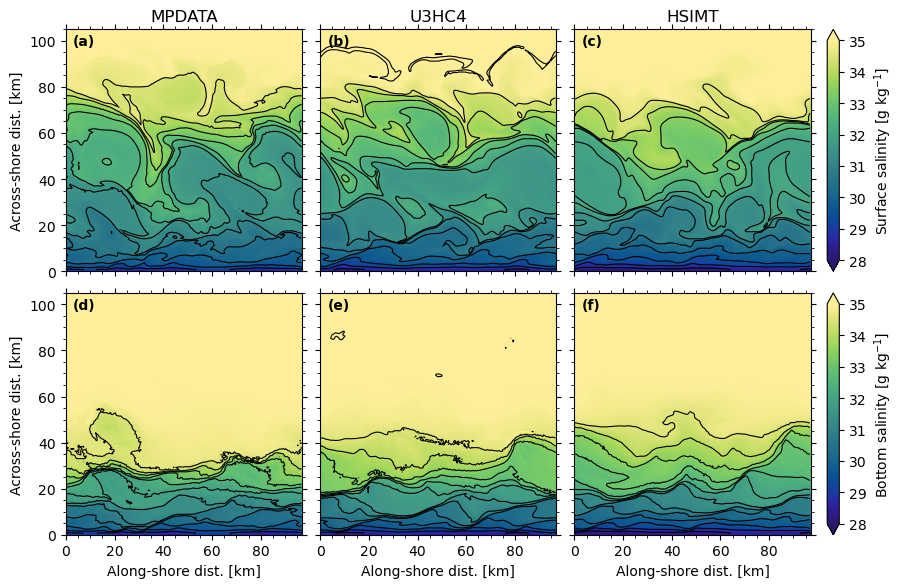

In [8]:
nrows = 2; ncols = 3
cm = cmo.haline # Colormap
fig, ax = plt.subplots(nrows,ncols,
                       figsize = ((7/2)*2.55,(8.66/3)*2), #Have to brute force the size
                       constrained_layout = True)
#Surface
t = -1
cs = ax[0,0].pcolormesh(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,-1], 
                        vmin = 28, vmax = 35, cmap = cm)
cc = ax[0,0].contour(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,-1], 
                     levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                     add_colorbar = False)
ax[0,1].pcolormesh(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,-1], 
                   vmin = 28, vmax = 35, cmap = cm)
ax[0,1].contour(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,-1], 
               levels = np.arange(28,35.5,0.5), colors = 'k', linewidths = 0.8,
               add_colorbar = False)
ax[0,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,-1], 
                   vmin = 28, vmax = 35, cmap = cm)
ax[0,2].contour(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,-1], 
                levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                add_colorbar = False)
#Bottom
cs1 = ax[1,0].pcolormesh(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,0], 
                         vmin = 28, vmax = 35, cmap = cm)
cc = ax[1,0].contour(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,0], 
                     levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                     add_colorbar = False)
ax[1,1].pcolormesh(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,0], 
                   vmin = 28, vmax = 35, cmap = cm)

ax[1,1].contour(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,0], 
                levels = np.arange(28,35.5,0.5), colors = 'k', linewidths = 0.8,
                add_colorbar = False)

ax[1,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                        vmin = 28, vmax = 35, cmap = cm)

ax[1,2].contour(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                      levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                      add_colorbar = False)

fig.colorbar(cs, ax = ax[0,-1], label = r'Surface salinity [g kg$^{-1}$]', extend = 'both')
fig.colorbar(cs1, ax = ax[1,-1], label = r'Bottom salinity [g kg$^{-1}$]', extend = 'both')

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_ylim(0,105)
        ax[i,j].set_yticks(np.arange(0,120,20))
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        # ax[i,j].set_aspect('equal') # Set aspect to equal since the domain is square

for i in range(nrows):
    for j in range(ncols-1):
        ax[i,j+1].set_yticklabels('')

for i in range(nrows):
    ax[i,0].set_ylabel('Across-shore dist. [km]')
    
for j in range(ncols):
    ax[0,j].set_xticklabels('')
    ax[-1,j].set_xlabel('Along-shore dist. [km]')
    
ax[0,0].set_title('MPDATA')
ax[0,1].set_title('U3HC4')
ax[0,2].set_title('HSIMT')

ax[0,0].text(3,98, '(a)', fontsize = 10, fontweight = 'heavy')
ax[0,1].text(3,98, '(b)', fontsize = 10, fontweight = 'heavy')
ax[0,2].text(3,98, '(c)', fontsize = 10, fontweight = 'heavy')

ax[1,0].text(3,98, '(d)', fontsize = 10, fontweight = 'heavy')
ax[1,1].text(3,98, '(e)', fontsize = 10, fontweight = 'heavy')
ax[1,2].text(3,98, '(f)', fontsize = 10, fontweight = 'heavy')

# path = 'shelf_dx_500_tadv_dt_30_day_30.jpg'
# plt.savefig(path, dpi = 500, bbox_inches='tight')

### Calculate normalized relative vorticity at the surface and plot 

In [9]:
#Functions for plotting 
def surface_vorticity(ds, grid):
    '''
Calculates the surface vertical vorticity normalized by 
the Coriolis frequency.
----
Inputs:
ds - Xarray Dataset
grid - XGCM grid object 
----
Outputs:
rvort_psi: Normalized vorticity on the psi points 

    '''
    u = ds.u.isel(s_rho=-1)
    v = ds.v.isel(s_rho=-1)

    dudy = grid.derivative(u, 'Y')
    dvdx = grid.derivative(v, 'X')
    
    num = (dvdx-dudy)
    num_rho = xroms.to_rho(num, grid)

    rvort = num_rho/ds.f
    
    return rvort

rvort_m = surface_vorticity(ds[0], grid[0])
rvort_u = surface_vorticity(ds[1], grid[1])
rvort_h = surface_vorticity(ds[2], grid[2])

### Check the extrema for plotting purposes 

In [10]:
xislice = slice(1,-1)
etaslice = slice(1,193) 

#Vorticity
print(rvort_m[-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, rvort_m[-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(rvort_u[-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, rvort_u[-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(rvort_h[-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, rvort_h[-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)

# Surface salinity 
print(ds[0].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[0].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(ds[1].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[1].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(ds[2].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[2].salt[-1,-1].isel(eta_rho = etaslice, xi_rho = xislice).max().values)

# Bottom salinity 
print(ds[0].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[0].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(ds[1].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[1].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).max().values)
print(ds[2].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).min().values, ds[2].salt[-1,0].isel(eta_rho = etaslice, xi_rho = xislice).max().values)

-2.0176802948117256 6.924138702452183
-1.8061215057969093 6.842776611447334
-1.884346157312393 8.501075655221939
28.610785 34.99997
28.32896 35.00451
28.117308 34.999966
28.613985 34.99995
28.3421 35.004406
28.11864 34.99994


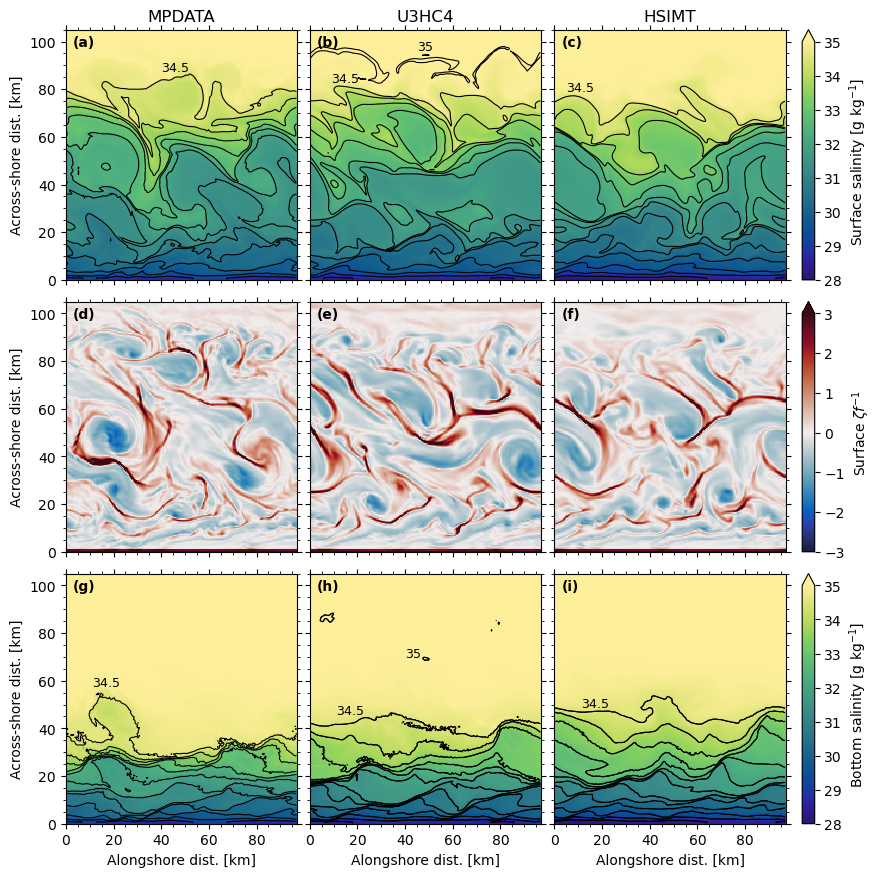

In [11]:
nrows = 3; ncols = 3
cm = cmo.haline # Colormap
fig, ax = plt.subplots(nrows,ncols,
                       figsize = ((7/2)*2.48,(8.66/3)*3), #Have to brute force the size
                       constrained_layout = True)
#Surface
t = -1
cs = ax[0,0].pcolormesh(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,-1], 
                        vmin = 28, vmax = 35, cmap = cm)
cc = ax[0,0].contour(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,-1], 
                     levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                     add_colorbar = False)
ax[0,1].pcolormesh(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,-1], 
                   vmin = 28, vmax = 35, cmap = cm)
ax[0,1].contour(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,-1], 
               levels = np.arange(28,35.5,0.5), colors = 'k', linewidths = 0.8,
               add_colorbar = False)
ax[0,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,-1], 
                   vmin = 28, vmax = 35, cmap = cm)
ax[0,2].contour(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,-1], 
                levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                add_colorbar = False)

# rvort_m[-1]
r = ax[1,0].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, rvort_m[t], vmin = -3, vmax = 3, cmap = cmo.balance)

ax[1,1].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, rvort_u[t], vmin = -3, vmax = 3, cmap = cmo.balance)

ax[1,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, rvort_h[t], vmin = -3, vmax = 3, cmap = cmo.balance)

#Bottom
cs1 = ax[2,0].pcolormesh(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,0], 
                         vmin = 28, vmax = 35, cmap = cm)
cc = ax[2,0].contour(ds[0].x_rho/1000,ds[0].y_rho/1000, ds[0].salt[t,0], 
                     levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                     add_colorbar = False)
ax[2,1].pcolormesh(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,0], 
                   vmin = 28, vmax = 35, cmap = cm)

ax[2,1].contour(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,0], 
                levels = np.arange(28,35.5,0.5), colors = 'k', linewidths = 0.8,
                add_colorbar = False)

ax[2,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                        vmin = 28, vmax = 35, cmap = cm)

ax[2,2].contour(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                      levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                      add_colorbar = False)

ax[2,1].contour(ds[1].x_rho/1000,ds[1].y_rho/1000, ds[1].salt[t,0], 
                levels = np.arange(28,35.5,0.5), colors = 'k', linewidths = 0.8,
                add_colorbar = False)

ax[2,2].pcolormesh(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                        vmin = 28, vmax = 35, cmap = cm)

ax[2,2].contour(ds[2].x_rho/1000,ds[2].y_rho/1000, ds[2].salt[t,0], 
                      levels = np.arange(28,36,0.5), colors = 'k', linewidths = 0.8,
                      add_colorbar = False)


fig.colorbar(cs, ax = ax[0,-1], label = r'Surface salinity [g kg$^{-1}$]', extend = 'max')
fig.colorbar(r, ax = ax[1,-1], label = r'Surface $\zeta f^{-1}$', extend = 'max')
fig.colorbar(cs1, ax = ax[2,-1], label = r'Bottom salinity [g kg$^{-1}$]', extend = 'max')

for i in range(nrows):
    for j in range(ncols):
        ax[i,j].set_ylim(0,105)
        ax[i,j].set_yticks(np.arange(0,120,20))
        ax[i,j].set_xticks(np.arange(0,100,20))
        ax[i,j].minorticks_on()
        ax[i,j].tick_params(which = 'both',bottom=True, top=True, left=True, right=True)
        ax[i,j].tick_params(which = 'both',labelbottom=True, labeltop=False, labelleft=True, labelright=False)
        ax[i,j].set_aspect('equal') # Set aspect to equal since the domain is square
        ax[1,j].set_xticklabels('')

for i in range(nrows):
    for j in range(ncols-1):
        ax[i,j+1].set_yticklabels('')

for i in range(nrows):
    ax[i,0].set_ylabel('Across-shore dist. [km]')
    
for j in range(ncols):
    ax[0,j].set_xticklabels('')
    ax[-1,j].set_xlabel('Alongshore dist. [km]')
    
ax[0,0].set_title('MPDATA')
ax[0,1].set_title('U3HC4')
ax[0,2].set_title('HSIMT')

#Add in subplot labels and specific contour lines
ax[0,0].text(3,98, '(a)', fontsize = 10, fontweight = 'heavy')
ax[0,1].text(3,98, '(b)', fontsize = 10, fontweight = 'heavy')
ax[0,2].text(3,98, '(c)', fontsize = 10, fontweight = 'heavy')

ax[1,0].text(3,98, '(d)', fontsize = 10, fontweight = 'heavy')
ax[1,1].text(3,98, '(e)', fontsize = 10, fontweight = 'heavy')
ax[1,2].text(3,98, '(f)', fontsize = 10, fontweight = 'heavy')

ax[2,0].text(3,98, '(g)', fontsize = 10, fontweight = 'heavy')
ax[2,1].text(3,98, '(h)', fontsize = 10, fontweight = 'heavy')
ax[2,2].text(3,98, '(i)', fontsize = 10, fontweight = 'heavy')

#Surface salinity labels 
ax[0,0].text(40,87.5, '34.5', fontsize = 9)
ax[0,1].text(9,83, '34.5', fontsize = 9)
ax[0,1].text(45,96.5, '35', fontsize = 9)
ax[0,2].text(5,79, '34.5', fontsize = 9)

# Bottom salinity labels
ax[2,0].text(11,57.5, '34.5', fontsize = 9)
ax[2,1].text(11,46, '34.5', fontsize = 9)
ax[2,1].text(40,70, '35', fontsize = 9)
ax[2,2].text(11,49, '34.5', fontsize = 9)

path = 'shelf_dx_500_tadv_dt_30_day_30.jpg'
# plt.savefig(path, dpi = 500, bbox_inches='tight')